In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import datetime

In [6]:
ticker='PG'
start = datetime.datetime(2014,1,1)
end = datetime.datetime(2024,1,1)

try:
    data = yf.download(ticker, start=start, end=end)['Adj Close']
    PG = pd.DataFrame(data)
    #data.columns = [ticker]
    #print(data.head())
except Exception as e:
    print(f"Ocurrio un error al intentar descargar los datos:{e}")

NameError: name 'datetime' is not defined

In [3]:
PG.head()

,Adj Close
Date,
1995-01-03,7.529935
1995-01-04,7.469571
1995-01-05,7.363947
1995-01-06,7.379033
1995-01-09,7.348850


In [4]:
PG.tail()

,Adj Close
Date,
2017-03-16,75.101341
2017-03-17,74.739960
2017-03-20,74.920647
2017-03-21,74.896011
2017-03-22,74.731750


Simple rate of return

$$\frac{P_1-P_0}{P_0}=\frac{P_1}{P_0}-1$$

In [5]:
PG['simple_return'] = (PG['Adj Close'] / PG['Adj Close'].shift(1) - 1)

In [6]:
print(PG['simple_return'])

Date
1995-01-03         NaN
1995-01-04   -0.008017
1995-01-05   -0.014141
1995-01-06    0.002049
1995-01-09   -0.004090
                ...   
2017-03-16    0.000438
2017-03-17   -0.004812
2017-03-20    0.002418
2017-03-21   -0.000329
2017-03-22   -0.002193
Name: simple_return, Length: 5595, dtype: float64


<Axes: xlabel='Date'>

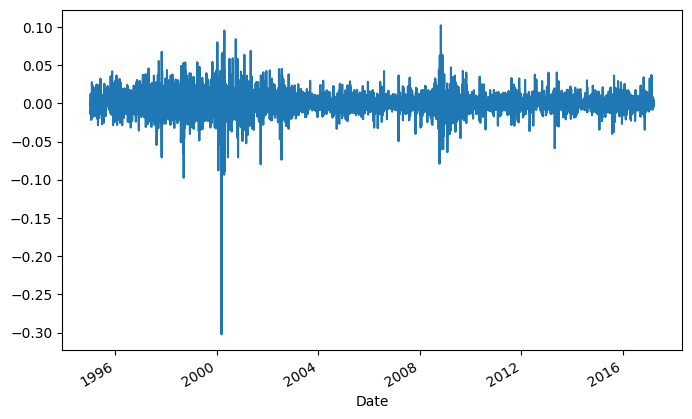

In [7]:
PG['simple_return'].plot(figsize=(8,5))

In [8]:
avg_returns_d = PG['simple_return'].mean()
avg_returns_d

# Este es el retorno diario

0.0005143588933523907

In [9]:
# El retorno anual, se calcula no multiplicando por 365, pues no hay actividad diaria realmente.
# Por quitar días sabado, domingo y feriados.
# Lo correcto es 250, a veces 251 o 252
# Así, el retorno anual es

In [10]:
avg_returns_a = PG['simple_return'].mean() * 250
avg_returns_a

0.12858972333809768

In [11]:
print(str(round(avg_returns_a, 5) * 100) + '%')

12.859000000000002%
